In [ ]:
import csv

class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.branches = {}
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi

    def add_branch(self, atribut_value, node):
        self.branches[atribut_value] = node

class DecisionTree:
    def __init__(self):
        self.root = None

    def buat_tree(self, data):
        self.root = self._buat_custom_tree(data)

    def _buat_custom_tree(self, data):
        root = TreeNode(atribut="Usia")
        usia_groups = {}

        for item in data:
            usia = item["Usia"]
            if usia not in usia_groups:
                usia_groups[usia] = []
            usia_groups[usia].append(item)

        for usia, usia_data in usia_groups.items():
            kategori_node = TreeNode(atribut="Kategori")
            kategori_groups = {}
            for item in usia_data:
                kategori = item["Kategori"]
                if kategori not in kategori_groups:
                    kategori_groups[kategori] = []
                kategori_groups[kategori].append(item)

            for kategori, kategori_data in kategori_groups.items():
                if kategori == "Fiksi":
                    genre_node = TreeNode(atribut="Genre")
                    genre_groups = {}
                    for item in kategori_data:
                        genre = item["Genre"]
                        if genre not in genre_groups:
                            genre_groups[genre] = []
                        genre_groups[genre].append(item)

                    for genre, genre_data in genre_groups.items():
                        halaman_node = TreeNode(atribut="Banyak halaman")
                        halaman_groups = {}
                        for item in genre_data:
                            halaman = item["Banyak halaman"]
                            if halaman not in halaman_groups:
                                halaman_groups[halaman] = []
                            halaman_groups[halaman].append(item)

                        for halaman, halaman_data in halaman_groups.items():
                            bahasa_node = TreeNode(atribut="Bahasa")
                            bahasa_groups = {}
                            for item in halaman_data:
                                bahasa = item["Bahasa"]
                                if bahasa not in bahasa_groups:
                                    bahasa_groups[bahasa] = []
                                bahasa_groups[bahasa].append(item)

                            for bahasa, bahasa_data in bahasa_groups.items():
                                leaf_node = TreeNode(is_leaf=True, rekomendasi=bahasa_data[0]["Rekomendasi Buku"])
                                bahasa_node.add_branch(bahasa, leaf_node)

                            halaman_node.add_branch(halaman, bahasa_node)

                        genre_node.add_branch(genre, halaman_node)

                    kategori_node.add_branch(kategori, genre_node)

                elif kategori == "Nonfiksi":
                    genre_node = TreeNode(atribut="Genre")
                    genre_groups = {}
                    for item in kategori_data:
                        genre = item["Genre"]
                        if genre not in genre_groups:
                            genre_groups[genre] = []
                        genre_groups[genre].append(item)

                    for genre, genre_data in genre_groups.items():
                        halaman_node = TreeNode(atribut="Banyak halaman")
                        halaman_groups = {}
                        for item in genre_data:
                            halaman = item["Banyak halaman"]
                            if halaman not in halaman_groups:
                                halaman_groups[halaman] = []
                            halaman_groups[halaman].append(item)

                        for halaman, halaman_data in halaman_groups.items():
                            bahasa_node = TreeNode(atribut="Bahasa")
                            bahasa_groups = {}
                            for item in halaman_data:
                                bahasa = item["Bahasa"]
                                if bahasa not in bahasa_groups:
                                    bahasa_groups[bahasa] = []
                                bahasa_groups[bahasa].append(item)

                            for bahasa, bahasa_data in bahasa_groups.items():
                                leaf_node = TreeNode(is_leaf=True, rekomendasi=bahasa_data[0]["Rekomendasi Buku"])
                                bahasa_node.add_branch(bahasa, leaf_node)

                            halaman_node.add_branch(halaman, bahasa_node)

                        genre_node.add_branch(genre, halaman_node)

                    kategori_node.add_branch(kategori, genre_node)

            root.add_branch(usia, kategori_node)

        return root

    def get_rekomendasi(self, user_preferences):
        current_node = self.root

        while not current_node.is_leaf:
            atribut = current_node.atribut
            value = user_preferences.get(atribut)

            if value not in current_node.branches:
                return "Buku tidak ditemukan"

            current_node = current_node.branches[value]

        return current_node.rekomendasi

def load_data_from_csv(file_path):
    data = []
    with open("DUMMY.csv", 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)
    return data

def main():
    file_path = "DUMMY.csv"
    data = load_data_from_csv(file_path)
    tree = DecisionTree()
    tree.buat_tree(data)

    print("Masukkan preferensi Anda untuk mendapatkan rekomendasi buku:")

    pilihan_usia = ["<7 ", "7 - 12", "13 - 16", "17 - 20", "21+"]
    pilihan_kategori = ["Fiksi", "Nonfiksi"]

    pilihan_genre_fiksi = ["Fantasi", "Aksi", "Misteri", "Horror", "Romantis", "Komedi"]
    pilihan_genre_nonfiksi = ["Sejarah", "Sains", "Biografi", "Inspiratif", "Ekonomi", "Kesehatan"]

    pilihan_halaman = ["<100", "100-300", "300+"]
    pilihan_bahasa = ["IND", "ENG"]

    while True:
        print("\nPilihan Usia:")
        for i, option in enumerate(pilihan_usia):
            print(f"  {i+1}. {option}")
        try:
            usia_idx = int(input("Pilih nomor usia (1-5): ")) - 1
            if 0 <= usia_idx < len(pilihan_usia):
                usia = pilihan_usia[usia_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 5.\033[0m")
        except ValueError:
            print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    while True:
        print("\nPilihan Kategori:")
        for i, option in enumerate(pilihan_kategori):
            print(f"  {i+1}. {option}")
        try:
            kategori_idx = int(input("Pilih nomor kategori (1-2): ")) - 1
            if 0 <= kategori_idx < len(pilihan_kategori):
                kategori = pilihan_kategori[kategori_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 2.\033[0m")
        except ValueError:
            print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    if kategori == "Fiksi":
        while True:
            print("\nPilihan Genre Fiksi:")
            for i, option in enumerate(pilihan_genre_fiksi):
                print(f"  {i+1}. {option}")
            try:
                genre_idx = int(input("Pilih nomor genre (1-6): ")) - 1
                if 0 <= genre_idx < len(pilihan_genre_fiksi):
                    genre = pilihan_genre_fiksi[genre_idx]
                    break
                else:
                    print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 6.\033[0m")
            except ValueError:
                print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")
    else:
        while True:
            print("\nPilihan Kategori Nonfiksi:")
            for i, option in enumerate(pilihan_genre_nonfiksi):
                print(f"  {i+1}. {option}")
            try:
                genre_idx = int(input("Pilih nomor kategori (1-6): ")) - 1
                if 0 <= genre_idx < len(pilihan_genre_nonfiksi):
                    genre = pilihan_genre_nonfiksi[genre_idx]
                    break
                else:
                    print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 6.\033[0m")
            except ValueError:
                print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    while True:
        print("\nPilihan Banyak Halaman:")
        for i, option in enumerate(pilihan_halaman):
            print(f"  {i+1}. {option}")
        try:
            halaman_idx = int(input("Pilih nomor banyak halaman (1-3): ")) - 1
            if 0 <= halaman_idx < len(pilihan_halaman):
                halaman = pilihan_halaman[halaman_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 3.\033[0m")
        except ValueError:
            print("Input tidak valid. Silakan masukkan angka.")

    while True:
        print("\nPilihan Bahasa:")
        for i, option in enumerate(pilihan_bahasa):
            print(f"  {i+1}. {option}")
        try:
            bahasa_idx = int(input("Pilih nomor bahasa (1-2): ")) - 1
            if 0 <= bahasa_idx < len(pilihan_bahasa):
                bahasa = pilihan_bahasa[bahasa_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 2.\033[0m")
        except ValueError:
            print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    user_preferences = {
        "Usia": usia,
        "Kategori": kategori,
        "Genre": genre,
        "Banyak halaman": halaman,
        "Bahasa": bahasa
    }

    rekomendasi = tree.get_rekomendasi(user_preferences)

    print("\nBerdasarkan preferensi Anda:")
    for key, value in user_preferences.items():
        print(f"  {key}: {value}")
    print(f"\n\033[1mRekomendasi Buku: {rekomendasi}\033[0m")

if __name__ == "__main__":
    main()

Masukkan preferensi Anda untuk mendapatkan rekomendasi buku:

Pilihan Usia:
  1. <7 
  2. 7 - 12
  3. 13 - 16
  4. 17 - 20
  5. 21+
Pilih nomor usia (1-5): 4

Pilihan Kategori:
  1. Fiksi
  2. Nonfiksi
Pilih nomor kategori (1-2): 1

Pilihan Genre Fiksi:
  1. Fantasi
  2. Aksi
  3. Misteri
  4. Horror
  5. Romantis
  6. Komedi
Pilih nomor genre (1-6): 1

Pilihan Banyak Halaman:
  1. <100
  2. 100-300
  3. 300+
Pilih nomor banyak halaman (1-3): 2

Pilihan Bahasa:
  1. IND
  2. ENG
Pilih nomor bahasa (1-2): 1

Berdasarkan preferensi Anda:
  Usia: 17 - 20
  Kategori: Fiksi
  Genre: Fantasi
  Banyak halaman: 100-300
  Bahasa: IND

Rekomendasi Buku: Rembulan Tenggelam di Wajahmu


In [ ]:
class SimpelNode:
    def __init__(self, nama, children=None):
        self.nama = nama
        self.children = children if children else []

def tampilkan_struktur(node, indent=""):
    print(indent + node.nama)
    for i, child in enumerate(node.children):
        is_last = (i == len(node.children) - 1)
        new_indent = indent + ("    " if is_last else "│   ")
        tampilkan_struktur(child, new_indent)

# Buat struktur kerangka pohon keputusan
tree = SimpelNode("Usia", [
    SimpelNode("Kategori", [
        SimpelNode("Genre", [
            SimpelNode("Banyak Halaman", [
                SimpelNode("Bahasa", [
                    SimpelNode("📘 Rekomendasi Buku")
                ])
            ])
        ])
    ])
])

# Tampilkan strukturnya
tampilkan_struktur(tree)


Usia
    Kategori
        Genre
            Banyak Halaman
                Bahasa
                    📘 Rekomendasi Buku


In [ ]:
def tampilkan_tree(node, indent=""):
    if node.is_leaf:
        print(indent + f"📘 Rekomendasi: {node.rekomendasi}")
    else:
        print(indent + f"📂 {node.atribut}")
        for value, child_node in node.branches.items():
            print(indent + f"├── {value}")
            tampilkan_tree(child_node, indent + "│   ")

def load_data_from_csv(file_path):
    import csv
    data = []
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)
    return data

file_path = "DUMMY.csv"
data = load_data_from_csv(file_path)

tree = DecisionTree()
tree.buat_tree(data)

tampilkan_tree(tree.root)



📂 Usia
├── <7 
│   📂 Kategori
│   ├── Fiksi
│   │   📂 Genre
│   │   ├── Fantasi
│   │   │   📂 Banyak halaman
│   │   │   ├── <100
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Putri Salju dan Tujuh Kurcaci
│   │   │   │   ├── ENG
│   │   │   │   │   📘 Rekomendasi: The Magic Garden
│   │   │   ├── 100-300
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Kisah Petualangan Si Kancil dan Teman-Temannya
│   │   │   │   ├── ENG
│   │   │   │   │   📘 Rekomendasi: The Enchanted Forest Stories
│   │   │   ├── 300+
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Cerita Rakyat Indonesia: Kumpulan Dongeng
│   │   │   │   ├── ENG
│   │   │   │   │   📘 Rekomendasi: The Chronicles of Narnia
│   │   ├── Aksi
│   │   │   📂 Banyak halaman
│   │   │   ├── <100
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Petualangan Kancil dan Buaya
│   │   │   │   ├── ENG
│ 

In [ ]:
from graphviz import Digraph

class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi
        self.branches = {}

    def add_branch(self, value, node):
        self.branches[value] = node

def visualize_tree(node, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box')

    node_id = str(id(node))
    label = f"Rekomendasi:\n{node.rekomendasi}" if node.is_leaf else f"Atribut:\n{node.atribut}"
    dot.node(node_id, label)

    if parent:
        dot.edge(parent, node_id, label=edge_label)

    for value, child in node.branches.items():
        visualize_tree(child, dot, node_id, str(value))

    return dot


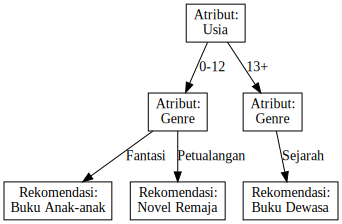

In [ ]:
# Contoh struktur tree
root = TreeNode(atribut="Usia")
anak1 = TreeNode(atribut="Genre")
anak2 = TreeNode(atribut="Genre")
leaf1 = TreeNode(is_leaf=True, rekomendasi="Buku Anak-anak")
leaf2 = TreeNode(is_leaf=True, rekomendasi="Novel Remaja")
leaf3 = TreeNode(is_leaf=True, rekomendasi="Buku Dewasa")

root.add_branch("0-12", anak1)
anak1.add_branch("Fantasi", leaf1)
anak1.add_branch("Petualangan", leaf2)
root.add_branch("13+", anak2)
anak2.add_branch("Sejarah", leaf3)

# Visualisasi dan tampilkan langsung di Colab
tree_diagram = visualize_tree(root)
tree_diagram

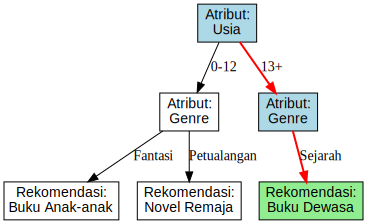

In [ ]:
from graphviz import Digraph

# Struktur node untuk decision tree
class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi
        self.branches = {}

    def add_branch(self, value, node):
        self.branches[value] = node

# Fungsi untuk mencari path berdasarkan input user
def get_path(node, user_input):
    path = [node]
    current = node
    while not current.is_leaf:
        atribut = current.atribut
        value = user_input.get(atribut)
        if value not in current.branches:
            break
        current = current.branches[value]
        path.append(current)
    return path

# Fungsi untuk membuat visualisasi dengan jalur input user ditandai
def visualize_tree_with_highlight(node, path=[], dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box', fontname='Helvetica')

    node_id = str(id(node))
    label = f"Rekomendasi:\n{node.rekomendasi}" if node.is_leaf else f"Atribut:\n{node.atribut}"

    if node in path:
        color = 'lightblue' if not node.is_leaf else 'lightgreen'
        dot.node(node_id, label, style='filled', fillcolor=color)
    else:
        dot.node(node_id, label)

    if parent:
        if node in path:
            dot.edge(parent, node_id, label=edge_label, color='red', penwidth='2')
        else:
            dot.edge(parent, node_id, label=edge_label)

    for value, child in node.branches.items():
        visualize_tree_with_highlight(child, path, dot, node_id, str(value))

    return dot

# ------------------------
# ✅ Contoh Tree
# ------------------------

# Root node
root = TreeNode(atribut="Usia")

# Cabang usia 0-12 → Genre
genre_1 = TreeNode(atribut="Genre")
root.add_branch("0-12", genre_1)

genre_1.add_branch("Fantasi", TreeNode(is_leaf=True, rekomendasi="Buku Anak-anak"))
genre_1.add_branch("Petualangan", TreeNode(is_leaf=True, rekomendasi="Novel Remaja"))

# Cabang usia 13+ → Genre
genre_2 = TreeNode(atribut="Genre")
root.add_branch("13+", genre_2)

genre_2.add_branch("Sejarah", TreeNode(is_leaf=True, rekomendasi="Buku Dewasa"))

# ------------------------
# ✅ Input User (STUDI KASUS)
# ------------------------

user_input = {
    "Usia": "13+",
    "Genre": "Sejarah"
}

# Cari jalur input
path = get_path(root, user_input)

# Visualisasi dengan highlight
tree_diagram = visualize_tree_with_highlight(root, path)
tree_diagram.render("tree_highlighted", format='png', cleanup=True)  # Save as PNG
tree_diagram  # Tampilkan di Google Colab


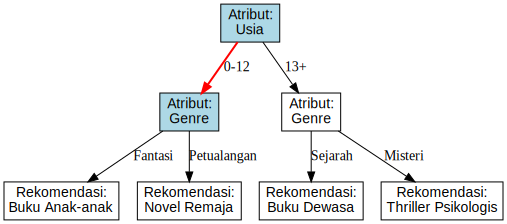

In [ ]:
# -------------------------------
# 1. Instalasi Library (Colab)
# -------------------------------
!pip install graphviz

# -------------------------------
# 2. Import & Struktur Tree
# -------------------------------
from graphviz import Digraph
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact

# Struktur node pohon keputusan
class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi
        self.branches = {}

    def add_branch(self, value, node):
        self.branches[value] = node

# -------------------------------
# 3. Fungsi: Cari Jalur & Gambar Tree
# -------------------------------

# Mencari jalur berdasarkan input user
def get_path(node, user_input):
    path = [node]
    current = node
    while not current.is_leaf:
        atribut = current.atribut
        value = user_input.get(atribut)
        if value not in current.branches:
            break
        current = current.branches[value]
        path.append(current)
    return path

# Visualisasi tree dengan highlight berdasarkan input user
def visualize_tree_with_highlight(node, path=[], dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box', fontname='Helvetica')

    node_id = str(id(node))
    label = f"Rekomendasi:\n{node.rekomendasi}" if node.is_leaf else f"Atribut:\n{node.atribut}"

    if node in path:
        color = 'lightblue' if not node.is_leaf else 'lightgreen'
        dot.node(node_id, label, style='filled', fillcolor=color)
    else:
        dot.node(node_id, label)

    if parent:
        if node in path:
            dot.edge(parent, node_id, label=edge_label, color='red', penwidth='2')
        else:
            dot.edge(parent, node_id, label=edge_label)

    for value, child in node.branches.items():
        visualize_tree_with_highlight(child, path, dot, node_id, str(value))

    return dot

# -------------------------------
# 4. Bangun Tree Contoh
# -------------------------------

# Root: Usia
root = TreeNode(atribut="Usia")

# Cabang usia 0-12
genre_1 = TreeNode(atribut="Genre")
genre_1.add_branch("Fantasi", TreeNode(is_leaf=True, rekomendasi="Buku Anak-anak"))
genre_1.add_branch("Petualangan", TreeNode(is_leaf=True, rekomendasi="Novel Remaja"))
root.add_branch("0-12", genre_1)

# Cabang usia 13+
genre_2 = TreeNode(atribut="Genre")
genre_2.add_branch("Sejarah", TreeNode(is_leaf=True, rekomendasi="Buku Dewasa"))
genre_2.add_branch("Misteri", TreeNode(is_leaf=True, rekomendasi="Thriller Psikologis"))
root.add_branch("13+", genre_2)

# -------------------------------
# 5. Input Interaktif + Gambar Tree
# -------------------------------

def tampilkan_tree(usia, genre):
    user_input = {
        "Usia": usia,
        "Genre": genre
    }
    path = get_path(root, user_input)
    tree = visualize_tree_with_highlight(root, path)
    display(tree)

interact(
    tampilkan_tree,
    usia=widgets.Dropdown(options=["0-12", "13+"], description="Usia:"),
    genre=widgets.Dropdown(options=["Fantasi", "Petualangan", "Sejarah", "Misteri"], description="Genre:")
)


Selamat datang di sistem rekomendasi buku!

Berapa usia kamu? (0-12 atau 13+): 13+
Pilihan genre: Sejarah / Misteri
Genre yang kamu suka: Sejarah

✅ Rekomendasi buku untuk kamu: Buku Dewasa


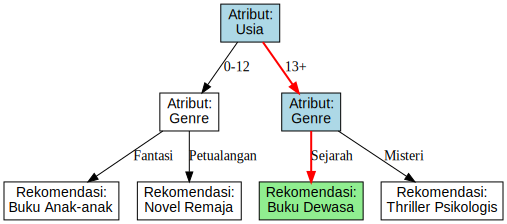

In [ ]:
from graphviz import Digraph
from IPython.display import display

# -------------------------------
# Struktur Tree dan Visualisasi
# -------------------------------

class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi
        self.branches = {}

    def add_branch(self, value, node):
        self.branches[value] = node

def get_path(node, user_input):
    path = [node]
    current = node
    while not current.is_leaf:
        atribut = current.atribut
        value = user_input.get(atribut)
        if value not in current.branches:
            break
        current = current.branches[value]
        path.append(current)
    return path

def visualize_tree_with_highlight(node, path=[], dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box', fontname='Helvetica')

    node_id = str(id(node))
    label = f"Rekomendasi:\n{node.rekomendasi}" if node.is_leaf else f"Atribut:\n{node.atribut}"

    if node in path:
        color = 'lightblue' if not node.is_leaf else 'lightgreen'
        dot.node(node_id, label, style='filled', fillcolor=color)
    else:
        dot.node(node_id, label)

    if parent:
        if node in path:
            dot.edge(parent, node_id, label=edge_label, color='red', penwidth='2')
        else:
            dot.edge(parent, node_id, label=edge_label)

    for value, child in node.branches.items():
        visualize_tree_with_highlight(child, path, dot, node_id, str(value))

    return dot

# -------------------------------
# Buat Tree Contoh
# -------------------------------

root = TreeNode(atribut="Usia")

genre_1 = TreeNode(atribut="Genre")
genre_1.add_branch("Fantasi", TreeNode(is_leaf=True, rekomendasi="Buku Anak-anak"))
genre_1.add_branch("Petualangan", TreeNode(is_leaf=True, rekomendasi="Novel Remaja"))
root.add_branch("0-12", genre_1)

genre_2 = TreeNode(atribut="Genre")
genre_2.add_branch("Sejarah", TreeNode(is_leaf=True, rekomendasi="Buku Dewasa"))
genre_2.add_branch("Misteri", TreeNode(is_leaf=True, rekomendasi="Thriller Psikologis"))
root.add_branch("13+", genre_2)

# -------------------------------
# Input Bertahap dari User
# -------------------------------

print("Selamat datang di sistem rekomendasi buku!\n")

# Pertanyaan 1
usia = input("Berapa usia kamu? (0-12 atau 13+): ").strip()

# Pertanyaan 2 tergantung usia
if usia == "0-12":
    print("Pilihan genre: Fantasi / Petualangan")
    genre = input("Genre yang kamu suka: ").strip()
elif usia == "13+":
    print("Pilihan genre: Sejarah / Misteri")
    genre = input("Genre yang kamu suka: ").strip()
else:
    print("Usia tidak valid.")
    genre = ""

# Simpan input
user_input = {
    "Usia": usia,
    "Genre": genre
}

# -------------------------------
# Tampilkan Hasil
# -------------------------------

# Cari jalur
path = get_path(root, user_input)

# Tampilkan rekomendasi
if path and path[-1].is_leaf:
    print(f"\n✅ Rekomendasi buku untuk kamu: {path[-1].rekomendasi}")
else:
    print("\n⚠️ Jawaban tidak cocok dengan data di tree.")

# Tampilkan visualisasi
tree = visualize_tree_with_highlight(root, path)
display(tree)
